# About

---

Twitter Sentiment Analysis project using Python, NLTK, Twitter API interface and Nick Sander's tweets corpus to evaluate the sentiment of Netflix users about it's platform services.

Developed by Jaques D'Erasmo S. Fernando as part of his final project on his cerification course through **University of California - San Diego at Edx Platform** in ***Python for Data Science***.



Contact --> jaques.ufba@gmail.com

Portfolio --> https://github.com/Jaquesd/Portifolio

Verified Certificate link --> https://courses.edx.org/certificates/2a8732fa24024af5be308fe4ee77d8a2

---

**Acknowledgment**

Thank you ***Felipe Solares*** (https://github.com/fsolares) and ***Eduardo Passos*** (https://github.com/eduardosteps), old friends and also Data Science students (12/19/2019) for your immeasurable contribution on this project, all your feedback, code sujection and support during my path gave me the strength to overcome this challenge. Congratualation for us, that was an ammazing and real team work.

# Sentiment Analysis using Python,  Twitter API and NLTK Naive Bayes Classifier

**Project purpose**

Perform a sentiment analysis using NLTK Naive Bayes Classifer to identify the sentiment from tweets users related with Netflix services (or any other high tech company as Apple, Microsoft, Google, for example).



## Step 1 - Importing libraries
---

README!

It is recommended that you install the most recent version of Anaconda distribution.

Additionally, few other packaged will need to be installed separately in case you do not have those installed. Bellow you can find each package and the installation command that can be executed from jupyter notebook cell except for the worldcloud package that need to be executed from the Anaconda Terminal (Windows) or the Terminal (Linux or MAC)

* tweepy - ***!pip install tweepy***
* textblob - ***!pip install textblob***
* worldcloud - ***conda install -c https://conda.anaconda.org/conda-forge wordcloud***

In [ ]:
#!pip install tweepy

In [ ]:
#!pip install textblob

In [1]:
#General Libraries

import pickle
import os
import tweepy #tweepy is a libraries that work similar as 'twitter' used during the course. I decided 
              #to use thatsince I previuosly new about that and I feel more confortble. It is important
              #to mention that the principles behind both libriries are the same
              
        
import pandas as pd
import nltk
from textblob import TextBlob #it is necessary install the textblob library if you don't have it yet! 
                              #This is a veryuseful library that will be used during this work in two ways, 
                              #as a translator for tweets in different languages and in a simplefied 
                              #sentiment analysis that will be aslo presented
            
            

# if you don't have the wordcloud library instaled, one option, if using Anaconda, you can install this 
# package with the command bellow (type exactly as it is bellow on your Anaconda Prompt):
# conda install -c conda-forge wordcloud


# Visualization Libraries

from operator import itemgetter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


# Preprocess Libraries

import re #module used to work with regular expressions
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords

nltk.download('movie_reviews')
nltk.download("punkt")
nltk.download("stopwords")

# Image visualization

from IPython.display import Image


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jaques/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/jaques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jaques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2 - Saving my credentials and creating the OAuth object to access tweets on Twitter
---

In [2]:
# This strucre will save your credentials at the first time you exetute it, after that, erase your
# credentials to avoind anyone else to use that
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = '<type your credential>'
    Twitter['Consumer Secret'] = '<type your credential>'
    Twitter['Access Token'] = '<type your credential>'
    Twitter['Access Token Secret'] = '<type your credential>'
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

In [3]:
# Authenticating and creating an API object

auth = tweepy.OAuthHandler(Twitter['Consumer Key'], Twitter['Consumer Secret'])
auth.set_access_token(Twitter['Access Token'], Twitter['Access Token Secret'])
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

## Step 3 - Getting tweets as test data
---

In [4]:
# Function that will access the Tweet and get tweets based on a search term, number of tweets, inicial 
# date and final date. This function will return a list of dictionaries where the key is the tweet text 
# and the values is a label, in this casa we are considering 'None' in the labor. This format is necessary
# for futures aplication

def get_tweets(word='google',number=100, since='2019-11-01', until='2019-11-28'):

    search_term = str(input('Hi! What are you looking for today? - '))
    num_of_terms = int(input('How many tweets do you want? - '))
    since = input('From which date? ex.: 2019-11-01 - ')
    until = input('Until which date? ex.: 2019-11-28 - ')

    data = []

    tweets = tweepy.Cursor(api.search,
                                #since = f'{since},
                                #until = f'{until},
                                q=search_term,
                                lang='en').items(num_of_terms)                                
                                
    for tweet in tweets:
        try:
            data.append(tweet.extended_tweet.full_text)
        except:
            data.append(tweet.text)

    
    new_data = set(data) #converting in a set to remove the duplicates

    new_data_dic = []

    for i in new_data:
        new_data_dic.append({'text':i, 'label':None}) #this strucure as a dictionary is necessary for  
                                                      #further purposes

    print()

    #Will print a message to the user 
    print('Great Job! We got '+str(len(data))+' tweets with the term '+word+'!!')


    return [i for i in new_data_dic]

In [6]:
# creating a tweets objecting and printing the first 4 tweets
tweets = get_tweets()
tweets[:3]


# IMPORTANT!!!

# The Twitter API have limitations on the total of tweets and how many requests can be made.
# A recomendation is do not request more than 3000 tweets in an interval of 15 min to avoid long waiting
# time.

Hi! What are you looking for today? - Netflix
How many tweets do you want? - 2000
From which date? ex.: 2019-11-01 - 2019-12-18
Until which date? ex.: 2019-11-28 - 2019-12-19

Great Job! We got 2000 tweets with the term google!!


[{'text': '@sarahwittman bussy netflix success', 'label': None},
 {'text': 'RT @notviking: therapy:\n\n- expensive\n- might not work\n\nwatching hot rod (2007) on netflix:\n\n- free\n- will always make you feel better since…',
  'label': None},
 {'text': 'Netflix has bs scary movies.', 'label': None}]

In [7]:
# Checking the final lengh of the request we can see the total is not the 1000 tweets requested. The 
# reason for that is that the tweet api return duplicates and the above function do the job of removing
# those.

len(tweets)

1179

## Step 4 - Getting training data
---

We'll use the Niek Sander's tweets corpus woth ~5000 classified tweets labelled as positive, negative, neutral or irrelevant. Those tweets are related with tech companies like, Apple, Google, Twitter, Youtube, Microsoft and others. Said that, the model that will be created is recommended to a search term related with tech companies. The performance lower if the sentiment analysis is related with another kind of topic.

**Getting Nick Sander's tweets corpus!**

* access the link https://github.com/zfz/twitter_corpus;
* download the file;
* we will use the **full-corpus.csv** file. This file already contain the tweets texts and it respective labels of *positive*, *negative*, *neutral* or *irrelevant*.


After download the file it is recommend that you explore it using Pandas for a better comprehension 

In [11]:
# Function to read the nick_sanders_corpus csv file and return a list containing the text and the label
# for each tweet

# reading the nick_sanders_corpus
df = pd.read_csv('full_corpus.csv')

#function
def trainingData():
    trainingData = [{'text':row[4], 'label':row[1]} for index,row in df.iterrows()]
    return trainingData

# The function return a list of dict containing the key (tweets text) and the values (the labels)


df.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [12]:
training_Data = trainingData()
training_Data[:3]

[{'text': 'Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is',
  'label': 'positive'},
 {'text': '@Apple will be adding more carrier support to the iPhone 4S (just announced)',
  'label': 'positive'},
 {'text': "Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY",
  'label': 'positive'}]

## Step 5 - Preprocessing tweets from test and training data
---

The preprocess step will use few python tools to work with strings as detailed bellow:

        USING .LOWER() STRING FUNCTION
        
            1 - Convert to lower case
        
        USING REGULAR EXPRESSIONS
            2 - Replace links with the string 'url'
            3 - Replace @ ... with 'at_user'
            4 - Replace #word with the word itself
            5 - Remove emoticons using ASCII encode and decode
        
        USING NLTK
            7 - Tokenize the tweet into words (a list of words)
            8 - Remove stopwords (including url and user, RT and '...')

In [13]:
# Creating a class to preprocess the test and training tweets

class Preprocess:
    def __init__(self):
        
        lst = ['AT_USER','URL','rt','...', "'s", "n't", "``", "''"]
        self._stopwords = set(stopwords.words('english')+list(punctuation)+lst)
        
        
    def processTweets(self, tweets):
        #tweets is a list of dict with Keys, 'text' and 'label'
        processedTweets = []
        #this list will be a list of tuple. Each tuple is a tweet which is a list of words and its label
        
        for tweet in tweets:
            processedTweets.append((self.cleanTweet(tweet['text']),tweet['label']))
                                         #it will apply the cleanTweet function only to the tweets text
        return processedTweets
    
    
    def processTweets_words(self, tweets):
        
        processedTweets = []
        #this list will be a list of each word in all tweets
        
        for tweet in tweets:
            processedTweets.append(self.cleanTweet(tweet['text']))
                                         #it will apply the cleanTweet function only to the tweets text
        return processedTweets
            
        
    def cleanTweet(self,tweet):
        #1 - Convert to lower case
        tweet = tweet.lower()
                
        #2 - Replace links with word 'URL'
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
        
        #3 - Replace @username with 'AT_USER'
        tweet = re.sub('@[^\s]+','AT_USER',tweet)
        
        #4 - Repalce #word (hashtag) with just the word, witouth the '#' simble
        tweet=re.sub(r'#([^\s]+)',r'\1',tweet)
        
        #5 - Remove emoticons
        tweet = tweet.encode('ascii', 'ignore').decode('ascii')
        
        #6 - Tokenizing the tweets
        tweet = word_tokenize(tweet)
        
        #7 - Removing stopwords 
        return [word for word in tweet if word not in self._stopwords]        

In [19]:
# Instantiating a Preprocess Class called 'tprocessor'
tprocessor = Preprocess()

# Creating an object that will contain the result of the TRAINING DATA after been preprocessed by the
# 'tprocessor' class
cleanedtrainingData = tprocessor.processTweets(training_Data)

# Creating an object that will contain the result of the TEST DATA after been preprocessed by the
# 'tprocessor' class
cleanedtestData = tprocessor.processTweets(tweets)

In [20]:
print(cleanedtrainingData[:10])

[(['get', 'swype', 'iphone', 'crack', 'iphone'], 'positive'), (['adding', 'carrier', 'support', 'iphone', '4s', 'announced'], 'positive'), (['hilarious', 'video', 'guy', 'duet', 'siri', 'pretty', 'much', 'sums', 'love', 'affair'], 'positive'), (['made', 'easy', 'switch', 'iphone', 'see', 'ya'], 'positive'), (['realized', 'reason', 'got', 'twitter', 'ios5', 'thanks'], 'positive'), (["'m", 'current', 'user', 'little', 'bit', 'disappointed', 'move'], 'positive'), (['16', 'strangest', 'things', 'siri', 'said', 'far', 'sooo', 'glad', 'gave', 'siri', 'sense', 'humor', 'via'], 'positive'), (['great', 'close', 'personal', 'event', 'tonight', 'regent', 'st', 'store'], 'positive'), (['companies', 'experience', 'best', 'customer', 'service', 'aside'], 'positive'), (['apply', 'job', 'hope', 'call', 'lol'], 'positive')]


In [21]:
print(cleanedtestData[:10])

[(['bussy', 'netflix', 'success'], None), (['therapy', 'expensive', 'might', 'work', 'watching', 'hot', 'rod', '2007', 'netflix', 'free', 'always', 'make', 'feel', 'better', 'since'], None), (['netflix', 'bs', 'scary', 'movies'], None), (['nooooo', 'daybreak', 'one', 'favorite', 'shows', 'year', 'mad', 'max', 'set', 'john', 'hughes', 'high', 'school', 'even', 'matth'], None), (['dont', 'watch', 'dont', 'fuck', 'cats', 'netflix', 'alone', '.i', 'repeat', 'dont', 'watch', 'fucking', 'bizarre', 'terrifying'], None), (['ok', 'im', 'dead', 'serious', 'us', 'planning', 'day', 'cancel', 'netflix', 'accounts', 'bc', 'wont', 'even', 'consider'], None), (['+as', 'christian', 'religion', 'nakakabastos', 'lang', 'nakakadisappoint', 'amp', 'even', 'funny', 'inopen', 'nila', 'yung', 'bible'], None), (['ryan', 'murphy', 'best', 'ever', 'thank', 'never', 'ageist'], None), (['since', 'tf', 'netflix', '16.95'], None), (['burlesque', 'netflix'], None)]


### Step 5.1 - Word Frequence Visualizations

* Word Frequence using a bar plot
* Word Frequence using a Word Cloud

In [22]:
# the result of the 'processTweets_words' is a list fo lists, so it will be necessary unify all words in
# only one list
words = tprocessor.processTweets_words(tweets)

unif_words =[]
for i in words:
    for j in i:
        unif_words.append(j)
        
unif_words[:5]

['bussy', 'netflix', 'success', 'therapy', 'expensive']

In [23]:
# word frequence using 'Counter' class from the 'collection' package

from collections import Counter

word_counter = Counter(unif_words)

In [24]:
most_common_words = word_counter.most_common()[:15]

In [25]:
print(most_common_words)

[('netflix', 853), ('watch', 102), ('dont', 87), ('cats', 81), ('jesus', 79), ('show', 79), ('watching', 77), ('like', 63), ('trailer', 61), ('im', 56), ('season', 55), ('anne', 50), ('good', 49), ('movie', 48), ('series', 47)]


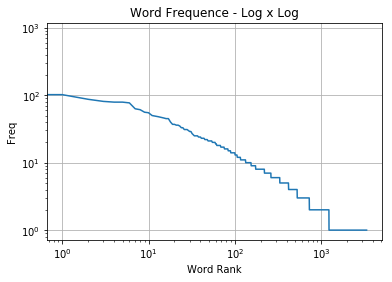

In [26]:
# Word distribution present a large vocabulary
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('Word Frequence - Log x Log')
plt.grid()
plt.show()

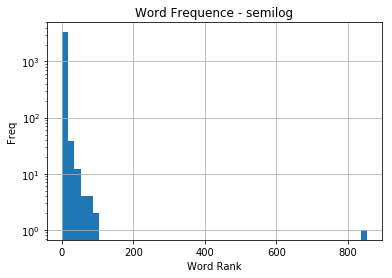

In [27]:
# Word distribution that allowed detect the count of words in a specific range

plt.hist(sorted_word_counts, bins=50, log=True);
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('Word Frequence - semilog')
plt.grid()
plt.show()

In [28]:
# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(most_common_words, columns=['word','freq'])

# sorting the words based on their frequence
df = df.sort_values(by=['freq'], ascending=False)

# getting the top 20 more frequent words
top_20 = df.head(20)
top_20

,word,freq
0,netflix,853
1,watch,102
2,dont,87
3,cats,81
4,jesus,79
5,show,79
6,watching,77
7,like,63
8,trailer,61
9,im,56


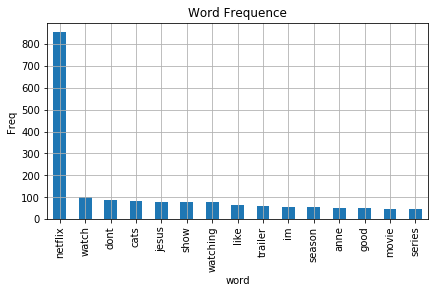

In [29]:
# Bar ploting from the top 20 more frequent words

axes = top_20.plot.bar(x='word',y='freq',legend=False)
plt.gcf().tight_layout()
plt.ylabel('Freq')
plt.grid()
plt.title('Word Frequence')
plt.show()

In [30]:
dic = {}
for item in unif_words:
    dic[item] = dic.get(item, 0) + 1

In [31]:
# Bulding a World Cloud



wordcloud = WordCloud(width=1600,   height=900,
                      prefer_horizontal=0.5,
                      min_font_size=10,
                      colormap='prism')

wordcloud = wordcloud.fit_words(dic)

wordcloud = wordcloud.to_file('TrendingTwitter.png')


#IMPORTANT!!!

#The result will create a png file in the fouder where the jupyter notebook are running. In order to see the
#result you will need to go check this file

In [16]:
Image(url = 'TrendingTwitter.png',width=900, unconfined=True)

## Step 6 - Using NLTK to extract features and train the Classifier Model
---

**Extract features from both the test data (the 100 tweets to be classifed) and the training data, downloaded from the corpus**
    
The NLTK model that will be used is known as NAVIE BAYES CLASSIFICATION

       1.1 - Build a vocabulary (list of all unique words in all the tweets in the training data);

       2.2 - Represent each tweet with the presence or absence of theses words;
             Ex.: Given a *vocabulary: {'the','worst','thing,'in','the','world'} and a *tweet: {'the','worst','thing'}        
                                    
                  This tweet will be represented as a "Feature Vector" (1,1,1,0,0,0) -> indicatinting that the 
                  first three words from the vocabulary are in the tweet, and there is other 3 words in the 
                  vocabulary that is not part of the mentioned tweet.

       2.3 - Use NLTK's built in Navie Bayes Classifier to train a Classifier                                 

In [32]:
#Defining the function to create a word Vocabulary or bag_of_words

def wordVocab(cleanedtrainingData):
    training_features = []
    for (words, sentiment) in cleanedtrainingData:
        training_features.extend(words)
    return list(set(training_features))

In [33]:
#Creating the word_features_vocab object

word_features_vocab = wordVocab(cleanedtrainingData)

In [34]:
# The NLTK library have a function called apply_features that takes a user-defined function to extract
# featrues from training data. In this case the function will be called extract_features_func that will
# take each tweet in the in the training data and repersent it with the presence or absence of a word in
# the vocabulary, as previously explaned in the item 2.2 above.

def extract_features_func(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in word_features_vocab:
        features[f'contains {word}'] = (word in tweet_words)
        # this step will creat a dictionary with keys like 'contains word1' and 'contains word2', and values
        # as True or False. The statement that create the True or False return is the '(word in tweet_words)'
        
    return features

In [35]:
# Creating the traning_features object

# apply_features will take the extract_features_func defined above, and apply it to each element of
# cleanedtrainingData. it automatically recognize that each of these elements are tuples where the
# first element is the text and the second is the label. The apply_features apply the extract_features_func
# only on the text element.

trainingFeature = nltk.classify.apply_features(extract_features_func,cleanedtrainingData)



In [36]:
# Creating the classifier objected, trained using the training data features 

NBclassifier = nltk.NaiveBayesClassifier.train(trainingFeature)

## Step 7 - Run the Classifier on the 2000 downloaded tweets
---

In [37]:
sentiment_classifier = [NBclassifier.classify(extract_features_func(tweet[0])) for tweet in cleanedtestData]

In [38]:
print('-='*40)
print('{:^80}'.format('SENTIMENT RESULTS USING NAIVE BAYES CLASSIFIER'))
print('-='*40)
print('')


if sentiment_classifier.count('positive'):
    print('Positive Sentiment = {:.2f}'.format(100*sentiment_classifier.count('positive')/len(sentiment_classifier))+"%")
          
if sentiment_classifier.count('negative'):
    print('Negative Sentiment = {:.2f}'.format(100*sentiment_classifier.count('negative')/len(sentiment_classifier))+"%")
    
if sentiment_classifier.count('neutral'):
    print('Neutral Sentiment = {:.2f}'.format(100*sentiment_classifier.count('neutral')/len(sentiment_classifier))+"%")
    
if sentiment_classifier.count('irrelevant') or sentiment_classifier.count('irrelevant') == 0:
    print('Irrelevant Sentiment = {:.2f}'.format(100*sentiment_classifier.count('irrelevant')/len(sentiment_classifier))+"%")
    

print('')
print('-='*40)
print('{:^80}'.format('First 10 tweets'))
print('-='*40)
print('')

tweets[0:10]


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                 SENTIMENT RESULTS USING NAIVE BAYES CLASSIFIER                 
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Positive Sentiment = 0.17%
Negative Sentiment = 1.53%
Neutral Sentiment = 96.52%
Irrelevant Sentiment = 1.78%

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                First 10 tweets                                 
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



[{'text': '@sarahwittman bussy netflix success', 'label': None},
 {'text': 'RT @notviking: therapy:\n\n- expensive\n- might not work\n\nwatching hot rod (2007) on netflix:\n\n- free\n- will always make you feel better since…',
  'label': None},
 {'text': 'Netflix has bs scary movies.', 'label': None},
 {'text': "RT @adamfgoldberg: NOOOOO! Daybreak is one of my favorite shows this year. It's Mad Max set in a John Hughes high school and even has Matth…",
  'label': None},
 {'text': 'Don’t watch don’t fuck with cats  on Netflix alone....I REPEAT DONT WATCH IT...IT IS FUCKING BIZARRE AND TERRIFYING',
  'label': None},
 {'text': 'RT @lettersforanne: ok so im dead serious about us planning a day where we all just cancel our netflix accounts bc they wont even consider…',
  'label': None},
 {'text': "RT @hebiancao__: +as a Christian, or from any religion nakakabastos lang and nakakadisappoint &amp; it's not even funny. Inopen nila yung bible…",
  'label': None},
 {'text': '@MiraSorvino @Rubyte

# A simplified approach using TextBlob library
---

The object of this section is to present a simple and very interest tool that I could discover on my journey to complete this project. I will also perform the same kind of sentiment analysis in a much more simplefied version using a powerful library called TextBlob.

TextBlob is an object-oriented NLP text-processing library that is built on the NLTK and pattern NLP libraries and simplifies many of their capabilities.

*During my exploration to perform this work I had the chance to learn about this library and I strongly recomend that you dedicate a time to read and understand better the main tasks that TextBlob can perform.*

In [39]:
# Libraries

import pickle
import os
import tweepy
from textblob import TextBlob

In [40]:
#Saving/loading the credations to access the tweet API

# This structure will save your credentials at the first time you exetute it, after that, erase your
# credentials to avoind anyone else to use that
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = 'your_cosumer_key_here'
    Twitter['Consumer Secret'] = 'your_cosumer_secret_here'
    Twitter['Access Token'] = 'your_access_token_here'
    Twitter['Access Token Secret'] = 'your_access_token_secret_here'
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))
    
    
# Authenticating and creating an API object

auth = tweepy.OAuthHandler(Twitter['Consumer Key'], Twitter['Consumer Secret'])
auth.set_access_token(Twitter['Access Token'], Twitter['Access Token Secret'])
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [41]:
# Function that will access the Tweet and get tweets based on a search term, number of tweets, inicial 
# date and final date. This function will return a list of dictionaries where the key is the tweet text
# and the values is a label, in this casa we are considering 'None' in the labor. This format is necessary
# for futures aplication


def get_tweets2(word='google',number=5, since='2019-11-01', until='2019-11-28'):

    search_term = str(input('Hi! What are you looking for today? - '))
    num_of_terms = int(input('How many tweets do you want? - '))
    since = input('From which date? ex.: 2019-11-01 - ')
    until = input('Until which date? ex.: 2019-11-28 - ')

    tweets = tweepy.Cursor(api.search,
                                #since = f'{since},
                                #until = f'{until},
                                q=search_term,
                                lang='en').items(num_of_terms)                                
                                
    
    positive = 0
    negative = 0
    neutral = 0

    for tweet in tweets:
        try:
            analysis = TextBlob(tweet.extended_tweet.full_text)
        except:
            analysis = TextBlob(tweet.text)
            
            if analysis.sentiment[0] > 0.00:
                positive += 1
            elif analysis.sentiment[0] < 0.00:
                negative += 1
            else:
                neutral += 1
                
    print()
    print('-=' * 3, 'TOTALS', '-=' * 3)
    print('Total Positives:', positive)
    print()
    print('Total Negatives:', negative)
    print()
    print('Total Neutrals:', neutral)
    print()
    print()
    print('-=' * 3, 'PERCENTAGE', '-=' * 3)
    print(int((positive / num_of_terms) * 100), '% Positives')
    print()
    print(int((negative / num_of_terms) * 100), '% Negatives')
    print()
    print(int((neutral / num_of_terms) * 100), '% Neutrals')
    print()
    
    return positive, negative, neutral

In [42]:
tweets2 = get_tweets2()

Hi! What are you looking for today? - Netflix
How many tweets do you want? - 200
From which date? ex.: 2019-11-01 - 2019-12-18
Until which date? ex.: 2019-11-28 - 2019-12-18

-=-=-= TOTALS -=-=-=
Total Positives: 96

Total Negatives: 17

Total Neutrals: 87


-=-=-= PERCENTAGE -=-=-=
48 % Positives

8 % Negatives

43 % Neutrals



### Adjusting the TextBlob to perform the sentiment analysis using a Navie Bayes Analyser

By default, a TextBlob and the Sentences and Words you get from it determine sentiment using a PatternAnalyzer, which uses the same sentiment analysis techniques as in the Pattern library. The TextBlob library also comes with a NaiveBayesAnalyzer9 (module text-blob.sentiments), **which was trained on a database of movie reviews**.

Considering that we can not re-train the algorithm in the TextBlob, it is important to understand that the performance compromised since the train data was not related with the topic of the search term that will be considered on this analysis, a term realated to a tech company for the sentiment analysis

In [43]:
from textblob.sentiments import NaiveBayesAnalyzer


# Recommendation!!!

# The sentiment analysis using TextBlob NaiveBayesAnalyzer presented a low performance in terms of speed,
# basically it takes long time to process the analysis. Request a max of 20 tweets in order to be able to
# quickly have a return and evaluate the result. If you have more time and a powerful machine you maybe want
# to try a larger tweet request.

In [44]:
def get_tweets3(word='google',number=5, since='2019-11-01', until='2019-11-28'):

    search_term = str(input('Hi! What are you looking for today? - '))
    num_of_terms = int(input('How many tweets do you want? - '))
    since = input('From which date? ex.: 2019-11-01 - ')
    until = input('Until which date? ex.: 2019-11-28 - ')

    tweets = tweepy.Cursor(api.search,
                                #since = f'{since},
                                #until = f'{until},
                                q=search_term,
                                lang='en').items(num_of_terms)                                
                                
    
    positive = 0
    negative = 0

    for tweet in tweets:
        
        blob = TextBlob(tweet.text, analyzer=NaiveBayesAnalyzer())

        if blob.sentiment.p_pos > blob.sentiment.p_neg:
            positive += 1
        else:
            blob.sentiment.p_pos < blob.sentiment.p_neg
            negative += 1

                
    print()
    print('-=' * 3, 'TOTALS', '-=' * 3)
    print('Total Positives:', positive)
    print()
    print('Total Negatives:', negative)
    print()
    print()
    print('-=' * 3, 'PERCENTAGE', '-=' * 3)
    print(int((positive / num_of_terms) * 100), '% Positives')
    print()
    print(int((negative / num_of_terms) * 100), '% Negatives')
    print()
    
    return positive, negative

In [47]:
tweets3 = get_tweets3()

Hi! What are you looking for today? - Netflix
How many tweets do you want? - 20
From which date? ex.: 2019-11-01 - 2019-12-19
Until which date? ex.: 2019-11-28 - 2019-12-19

-=-=-= TOTALS -=-=-=
Total Positives: 14

Total Negatives: 6


-=-=-= PERCENTAGE -=-=-=
70 % Positives

30 % Negatives

